In [2]:
import sys
import os



import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [137]:
net_heat = ContTempNetwork.load('fig3_network250_temporal_heat')

In [28]:
slow_lamdas=np.logspace(-10,-6,200)
between_slow_lamdas=np.linspace(-10,-6,200)

lamdas = np.logspace(-5,0,200)
between_lamdas=np.linspace(-5,0,200)

In [68]:
# p1 = p2 = 1/net_heat.num_nodes * np.ones((net_heat.num_nodes))
# P = eye(net_heat.num_nodes, dtype=np.float64).tocsr()
# P.data = p1

# multi_res_sam = {}


# for i, lamda in enumerate(slow_lamdas):
#     with open(f'//scratch/tmp/180/skoove/experiment250_temporal_static_weighted_heat/T_slow/T{slow_lamdas[i]:.11f}', 'rb') as f:
#         T = pickle.load(f)['T'][-1]

#     PT = P @ T
#     sam = sparse_autocov_mat(PT, p1, p2, PT_symmetric=True)
#     S = sam.from_T(T = T, p1 = p1, p2 = p2)
#     clustering = SparseClustering(p1=p1, p2=p2,
#                         T=T, S=S)
#     clusters, stabilites, seeds = parallel_clustering.compute_parallel_clustering(clustering, num_repeat=50, nproc=10, 
#                                 verbose=False, n_meta_iter_max=1000, 
#                                 n_sub_iter_max=1000, 
#                                 clust_verbose=False, print_num_loops=False)
#     multi_res_sam[lamda] = clusters

#     file=f'//scratch/tmp/180/skoove/experiment250_temporal_static_weighted_heat/sam_slow/sam{slow_lamdas[i]:.11f}'
#     with open(file, 'wb') as fopen:
#         pickle.dump(S, fopen)
    
#     print(i)

# file=f'//scratch/tmp/180/skoove/experiment250_temporal_static_weighted_heat/clusters_sam_slow'
# with open(file, 'wb') as fopen:
#     pickle.dump(multi_res_sam, fopen)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [69]:
# with open('//scratch/tmp/180/skoove/experiment250_temporal_static_weighted_heat/clusters_sam_slow', 'rb') as f:
#     multi_res_static_weighted_heat_sam = pickle.load(f)
    
# avg_csize_forw_static_weighted_heat_sam = [np.mean([len(c) for c in \
#                    multi_res_static_weighted_heat_sam[lamda] if len(c)>1]) for lamda in slow_lamdas]

# NVI_forw_static_weighted_heat_sam = [avg_norm_var_information(multi_res_static_weighted_heat_sam[lamda]) for lamda in slow_lamdas]

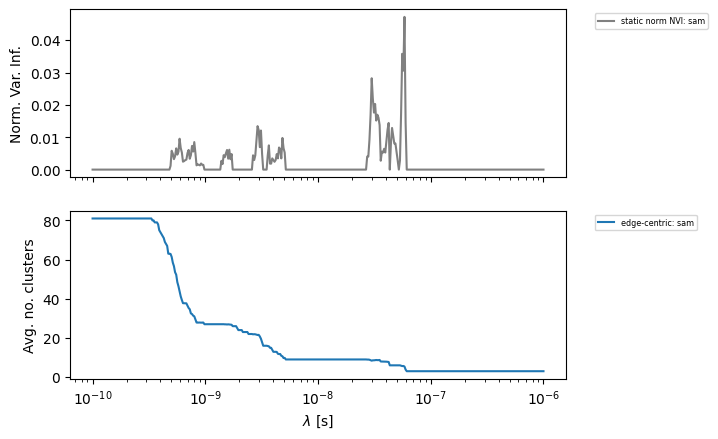

In [70]:
# max_NVI_sam = max(NVI_forw_static_weighted_heat_sam)

 
# fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

# #ax1.plot(slow_lamdas, NVI_forw_static_weighted_heat, 'black', label='static norm NVI: integral')
# # ax1.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
# #            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI], colors='purple')
# ax1.plot(slow_lamdas, NVI_forw_static_weighted_heat_sam, 'grey', label='static norm NVI: sam')

# #ax2.plot(slow_lamdas, avg_csize_forw_static_weighted_heat, '-', label='edge-centric: integral')
# # ax2.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
# #            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [81, 81, 81, 81, 81, 81, 81, 81], colors='purple')
# ax2.plot(slow_lamdas, avg_csize_forw_static_weighted_heat_sam, '-', label='edge-centric: sam')

# ax1.set_xscale('log')
# ax1.set_ylabel('Norm. Var. Inf.')
# ax1.legend()
# ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

# ax2.set_xlabel(r'$\lambda$ [s]')
# ax2.set_ylabel('Avg. no. clusters')
# ax2.legend()
# ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

# Flow Clustering

In [138]:
list_forw_flows = []

for i, l in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment250_temporal_heat/T/T{l:.11f}', 'rb') as f:
        T_list = pickle.load(f)['T']

    list_forw_flows.append(FlowIntegralClustering(T_list=T_list,
                                  time_list=net_heat.times,
                                  verbose=False))
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [139]:
multi_res = {}

for i, lamda in enumerate(lamdas):
    flowintegralclustering = list_forw_flows[i]
    clustering = SparseClustering(p1=flowintegralclustering.p1, p2=None,
                        T=flowintegralclustering.T_list[-1], S=flowintegralclustering.I_list[0])
    clusters, stabilites, seeds = parallel_clustering.compute_parallel_clustering(clustering, num_repeat=50, nproc=20, 
                                verbose=False, n_meta_iter_max=1000, 
                                n_sub_iter_max=1000, 
                                clust_verbose=False, print_num_loops=False)
    multi_res[lamda] = clusters
    print(i)

file=f'//scratch/tmp/180/skoove/experiment250_temporal_heat/clusters'
with open(file, 'wb') as fopen:
    pickle.dump(multi_res, fopen)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [44]:
multi_res_heat = {}
for lamda in np.logspace(-5,0,200):
    with open(f'//scratch/tmp/180/skoove/experiment250_temporal_heat/clustersflow/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)

    multi_res_heat[lamda] = cluster
avg_csize_forw_heat = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas]

NVI_forw_heat = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas]

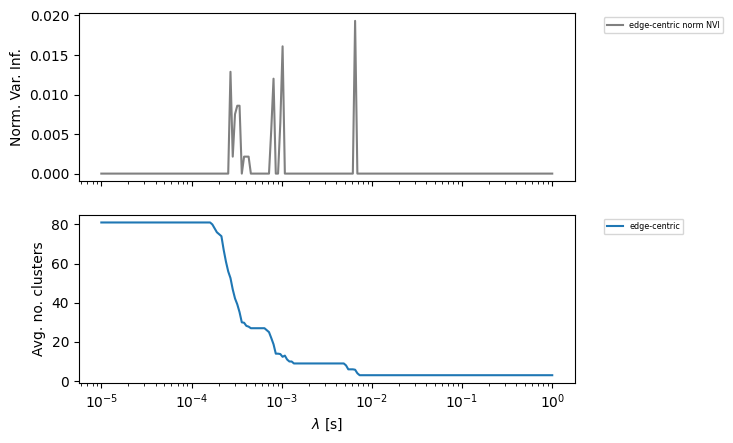

In [45]:
max_NVI = max(NVI_forw_heat)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

    
# ax1.plot(lamdas, NVI_forw_heat, 'black', label='node-centric norm NVI')
# ax1.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
#            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI], colors='purple')
ax1.plot(lamdas, NVI_forw_heat, 'grey', label='edge-centric norm NVI')

# ax2.plot(lamdas, avg_csize_forw, '-', label='node-centric')
# ax2.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
#            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [81, 81, 81, 81, 81, 81, 81, 81], colors='purple')
ax2.plot(lamdas, avg_csize_forw_heat, '-', label='edge-centric')

ax1.set_xscale('log')
ax1.set_ylabel('Norm. Var. Inf.')
ax1.legend()
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.set_xlabel(r'$\lambda$ [s]')
ax2.set_ylabel('Avg. no. clusters')
ax2.legend()
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

In [42]:
with open('//scratch/tmp/180/skoove/experiment250_temporal_heat/clusters', 'rb') as f:
    multi_res_heat = pickle.load(f)
    
avg_csize_forw_heat = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas]

NVI_forw_heat = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas]

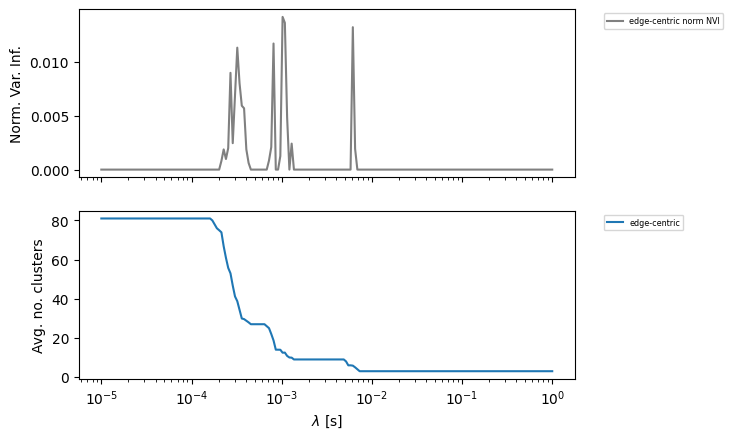

In [43]:
max_NVI = max(NVI_forw_heat)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

    
# ax1.plot(lamdas, NVI_forw_heat, 'black', label='node-centric norm NVI')
# ax1.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
#            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI], colors='purple')
ax1.plot(lamdas, NVI_forw_heat, 'grey', label='edge-centric norm NVI')

# ax2.plot(lamdas, avg_csize_forw, '-', label='node-centric')
# ax2.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
#            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [81, 81, 81, 81, 81, 81, 81, 81], colors='purple')
ax2.plot(lamdas, avg_csize_forw_heat, '-', label='edge-centric')

ax1.set_xscale('log')
ax1.set_ylabel('Norm. Var. Inf.')
ax1.legend()
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.set_xlabel(r'$\lambda$ [s]')
ax2.set_ylabel('Avg. no. clusters')
ax2.legend()
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

# Derivatives

In [63]:
def derivative(v1, v2):
    assert len(v1) == len(v2), "Error: in order to compute the numerical derivative, the two varibales need to have the same lenght."
    derivative = []
    for i, vi in enumerate(v1[1:]):
        m1 =(vi - v1[i-1])/(v2[i]-v2[i-1])
        m2 =(v1[i+1] - vi)/(v2[i+1]-v2[i])
        derivative.append((m1+m2)/2)
    return derivative

In [71]:
# vNS_static_weighted_heat_end = []
# for i, lamda in enumerate(slow_lamdas):
#     with open(f'/scratch/tmp/180/skoove/experiment250_static_weighted_heat/vNS_slow/vNS{lamda:.11f}', 'rb') as f:
#         S = pickle.load(f)['vNS']
#         vNS_static_weighted_heat_end.append(S[list(S.keys())[0]][0])

vNSsam_static_weighted_heat_end = []
for i, lamda in enumerate(slow_lamdas):
    with open(f'/scratch/tmp/180/skoove/experiment250_temporal_static_weighted_heat/vNSsam_slow/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNSsam_static_weighted_heat_end.append(S)

vNS_heat_end = []
for i, lamda in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment250_temporal_heat/vNS/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS_heat_end.append(S[list(S.keys())[0]][0])

In [72]:
#v1 = vNS_static_weighted_heat_end
w1 = vNS_heat_end
z1 = vNSsam_static_weighted_heat_end
v2 = between_lamdas
#ds_dt = derivative(v1, v2)
ds7_dt = derivative(w1, v2)
dssam_dt = derivative(z1, v2)

# plt.subplot(1, 2, 1)
# plt.plot(lamdas[1:], ds_dt)
# plt.plot(lamdas[1:], ds7_dt)

# plt.subplot(1, 2, 2)
# plt.plot(lamdas[1:], ds_dt, label='t = net.times[0]')
# plt.plot(lamdas[1:], ds7_dt, label='t ~ t_end')
# plt.xscale('log')
# plt.title('Static Network: d(vNS) / dlamda')
# plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
# #plt.savefig('./figures/fig3_recap_entropy_plots/fig3_dvNS_dlamda.eps', format='eps')

# plt.show()

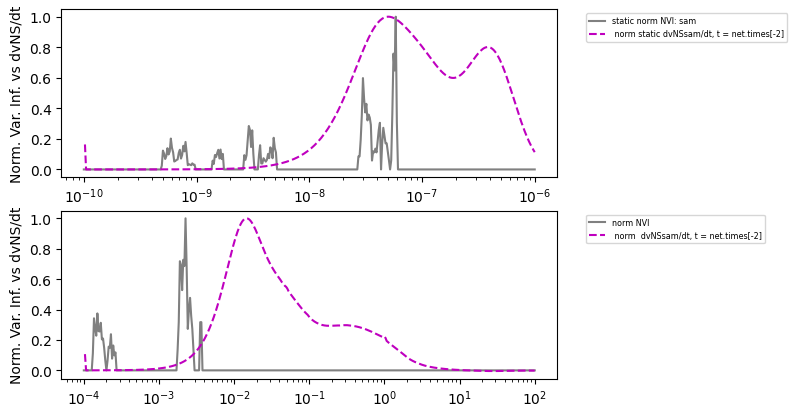

In [73]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=False)

#ax1.plot(slow_lamdas, NVI_forw_static_weighted_heat / max(NVI_forw_static_weighted_heat), 'black', label='static norm NVI: Integral')
ax1.plot(slow_lamdas, NVI_forw_static_weighted_heat_sam / max(NVI_forw_static_weighted_heat_sam) , 'grey', label='static norm NVI: sam')
ax1.plot(slow_lamdas[1:], dssam_dt / min(dssam_dt), 'm--', label=' norm static dvNSsam/dt, t = net.times[-2]')
ax1.set_xscale('log')

ax1.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))



#ax1.plot(slow_lamdas, NVI_forw_static_weighted_heat / max(NVI_forw_static_weighted_heat), 'black', label='static norm NVI: Integral')
ax2.plot(lamdas, NVI_forw_heat / max(NVI_forw_heat) , 'grey', label='norm NVI')
ax2.plot(lamdas[1:], ds7_dt / min(ds7_dt), 'm--', label=' norm  dvNSsam/dt, t = net.times[-2]')
ax2.set_xscale('log')

ax2.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

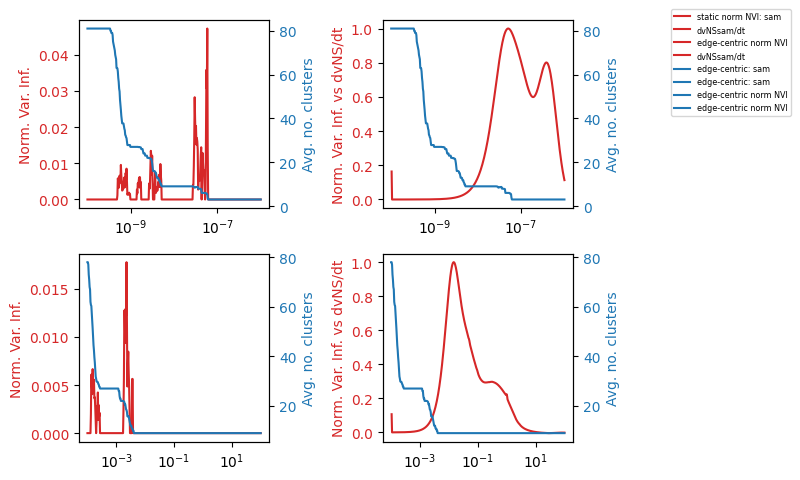

In [86]:
fig, axs = plt.subplots(2,2, sharex=False)

####### First Plot
color = 'tab:red'
axs[0,0].plot(slow_lamdas, NVI_forw_static_weighted_heat_sam, color=color, label='static norm NVI: sam')

axs[0,0].set_xscale('log')
axs[0,0].set_ylabel('Norm. Var. Inf.', color=color)
axs[0,0].tick_params(axis='y', labelcolor=color)

ax1 = axs[0,0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax1.plot(slow_lamdas, avg_csize_forw_static_weighted_heat_sam, color=color, label='edge-centric: sam')

ax1.set_xlabel(r'$\lambda$ [s]')
ax1.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)

####### Second Plot

color = 'tab:red'
axs[0,1].plot(slow_lamdas[1:], dssam_dt / min(dssam_dt), color=color, label='dvNSsam/dt')

axs[0,1].set_xscale('log')
axs[0,1].set_ylabel('Norm. Var. Inf. vs dvNS/dt', color=color)
axs[0,1].tick_params(axis='y', labelcolor=color)

ax2 = axs[0,1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(slow_lamdas, avg_csize_forw_static_weighted_heat_sam, color=color, label='edge-centric: sam')

ax2.set_xlabel(r'$\lambda$ [s]')
ax2.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


####### Third Plot
color = 'tab:red'
axs[1,0].plot(lamdas, NVI_forw_heat, label='edge-centric norm NVI', color=color)

axs[1,0].set_xscale('log')
axs[1,0].set_ylabel('Norm. Var. Inf.', color=color)
axs[1,0].tick_params(axis='y', labelcolor=color)

ax3 = axs[1,0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax3.plot(lamdas, avg_csize_forw_heat, label='edge-centric norm NVI', color=color)

ax3.set_xlabel(r'$\lambda$ [s]')
ax3.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor=color)

####### Fourth Plot

color = 'tab:red'
axs[1,1].plot(lamdas[1:], ds7_dt / min(ds7_dt), label='dvNSsam/dt', color=color)

axs[1,1].set_xscale('log')
axs[1,1].set_ylabel('Norm. Var. Inf. vs dvNS/dt', color=color)
axs[1,1].tick_params(axis='y', labelcolor=color)

ax4 = axs[1,1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.plot(lamdas, avg_csize_forw_heat, label='edge-centric norm NVI', color=color)

ax4.set_xlabel(r'$\lambda$ [s]')
ax4.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor=color)




fig.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()